In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:

data=pd.read_csv('AmesHousing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data = data.dropna(axis=1, thresh=int(0.8 * len(data)))
for col in data.columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)
data

/tmp/ipykernel_73648/196586223.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipykernel_73648/196586223.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [4]:
var_label = {}
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    var_label[col] = le
lablenc=var_label
lablenc

{'MS Zoning': LabelEncoder(),
 'Street': LabelEncoder(),
 'Lot Shape': LabelEncoder(),
 'Land Contour': LabelEncoder(),
 'Utilities': LabelEncoder(),
 'Lot Config': LabelEncoder(),
 'Land Slope': LabelEncoder(),
 'Neighborhood': LabelEncoder(),
 'Condition 1': LabelEncoder(),
 'Condition 2': LabelEncoder(),
 'Bldg Type': LabelEncoder(),
 'House Style': LabelEncoder(),
 'Roof Style': LabelEncoder(),
 'Roof Matl': LabelEncoder(),
 'Exterior 1st': LabelEncoder(),
 'Exterior 2nd': LabelEncoder(),
 'Exter Qual': LabelEncoder(),
 'Exter Cond': LabelEncoder(),
 'Foundation': LabelEncoder(),
 'Bsmt Qual': LabelEncoder(),
 'Bsmt Cond': LabelEncoder(),
 'Bsmt Exposure': LabelEncoder(),
 'BsmtFin Type 1': LabelEncoder(),
 'BsmtFin Type 2': LabelEncoder(),
 'Heating': LabelEncoder(),
 'Heating QC': LabelEncoder(),
 'Central Air': LabelEncoder(),
 'Electrical': LabelEncoder(),
 'Kitchen Qual': LabelEncoder(),
 'Functional': LabelEncoder(),
 'Garage Type': LabelEncoder(),
 'Garage Finish': LabelEnco

In [5]:

X = data.drop(columns=["SalePrice"],axis=1)
y = data["SalePrice"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[-1.2810083 , -0.99155697, -0.87700484, ...,  0.91884468,
         0.34164015, -0.7247024 ],
       [-0.74543215,  1.01755147,  0.06128506, ...,  0.91884468,
         0.34164015, -3.51250726],
       [ 0.51252155, -0.95408993,  0.76500248, ..., -0.60046396,
         0.34164015,  0.20456589],
       ...,
       [-0.39547511, -0.98556313,  0.06128506, ...,  0.15919036,
         0.34164015,  0.20456589],
       [-0.20157999,  0.99441452, -0.17328741, ...,  0.15919036,
         0.34164015,  0.20456589],
       [-0.71469268,  1.02153687,  0.64771625, ...,  0.91884468,
         0.34164015,  0.20456589]], shape=(2344, 75))

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
### Linear Regression Model ###
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
y_pred_lr = lr_model.predict(X_test_scaled)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

In [10]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [11]:
y_pred_dt = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

In [12]:
# Print Performance Metrics
print("\n🔹 Linear Regression Results:")
print(f"  - MAE: {lr_mae:.2f}")
print(f"  - R² Score: {lr_r2:.4f}")

print("\n🔹 Decision Tree Results:")
print(f"  - MAE: {dt_mae:.2f}")
print(f"  - R² Score: {dt_r2:.4f}")


🔹 Linear Regression Results:
  - MAE: 20197.90
  - R² Score: 0.8615

🔹 Decision Tree Results:
  - MAE: 23110.71
  - R² Score: 0.8494


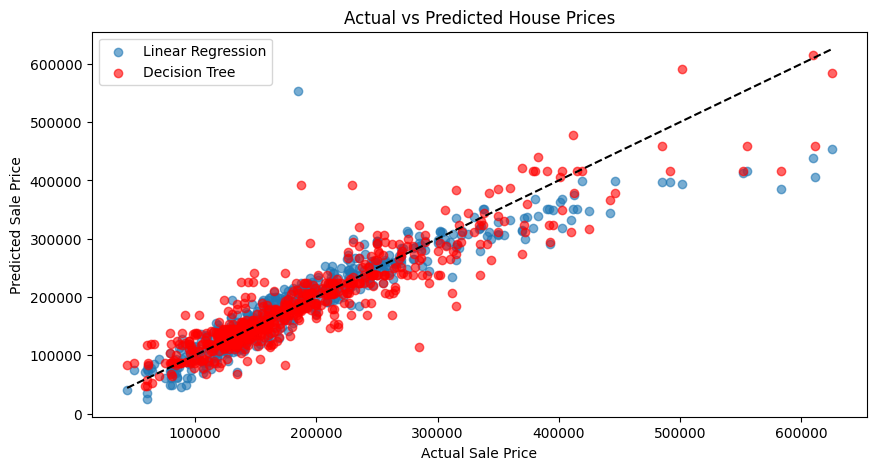

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.scatter(y_test, y_pred_dt, label="Decision Tree", alpha=0.6, color="red")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.legend()
plt.title("Actual vs Predicted House Prices")
plt.show()